# Modulo N°3:  Proyecto Mayo "Optimización" 

Samuel Sáez F. - Felipe Pirul Y.

## Introducción ##


Queremos implementar un algoritmo de optimización para el ajuste de curvas, donde la función de costo se define por la comparación de datos con un modelo. Para esto, consideraremos el modelo simplificado de Weibull y el modelo de Higuchi(dos variables).
Posteriormente mostraremos un ejemplo de la función de Rosenbrock, para la cual obtrendremos su gráfico, cálculo de gradiente, dirección del descenso.

## Modelos y datos  ##

El modelo simplificado de Weibull está definido por: $ u(t)= 1-e^{-at} $

Mientras que el modelo de Higuchi está definido por: $ u(t) = at^ \frac{1}{2} $

Y la función de costo por: $ f(p) = \sum_{i=1}^{n}(y(p;x_{i})-y_{i})^2  $   la cual se define como "una función capaz de medir la diferencia de lo pronosticado por el modelo a los datos experimentales".

Podemos obtener la primera y segunda derivada de la función de costo aplicada a la función de Weibull de la siguiente forma:

$ f(p) = \sum_{i=1}^{n}(y(p;x_{i})-y_{i})^2 $ 

$ f(p) = \sum_{i=1}^{n}((1-e^{-ax_{i}}))-y_{i})^2 $ 

Primera derivada: 

$  2((1-e^{-ax_{i}})-y_{i})e^{-ax_{i}} \cdot x_{i} $

Segunda derivada:

$ 2x_{i}(e^{-ax_{i}}x_{i}y+2e^{-2ax_{i}}x_{i}-e^{-ax_{i}}x_{i}) $ 


Tambien podemos obtener la función de costo aplicada a la función de Higuchi la cual utilizaremos más adelante:
$ f(p) = \sum_{i=1}^{n}((at^{\frac{1}{2}}))^2 $ 


#### Los datos a usar serán: 

| x   | y    |
|-----|------|
| 0.1 | 0.2  |
| 0.2 | 0.3  |
| 0.3 | 0.45 |
| 0.4 | 0.55 |
| 0.5 | 0.6  |
| 0.6 | 0.7  |
| 0.7 | 0.75 |
| 0.8 | 0.8  |
| 0.9 | 0.8  |
| 1.0 | 0.8  |


Función de costo aplicada a Higuchi implementando los datos: 
$ f(p) = \sum_{i=1}^{10}((at^{\frac{1}{2}}))^2 $ 


## Implementación 

Utilizaremos la libreria Matplotlib y Numpy para la realización de los gráficos.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches


Definimos las funciones de Weibull e Higuchi respectivamente:

In [6]:
def Weibull(y,x):
    x_1 = 1-np.exp(-(x*y))
    return x_1

def Higuchi(y,x):
    x_2 = x*y**(0.5)
    return x_2

Definimos arreglos con datos mencionados anteriormente :



In [22]:
#DATOS EXPERIMENTALES TABLA GUIÓN#
a1 = np.linspace(0.1,1.0,10)
a2 = [0.2,0.3,0.45,0.55,0.6,0.7,0.75,0.8,0.8,0.8]

Iteramos por cada valor: 

In [23]:
wb = []
hg = []
for x in range(len(a1)):
    wb.append(Weibull(a2[x], a1[x]))
    hg.append(Higuchi(a2[x], a1[x]))

Mostrando en pantalla los valores obtenidos junto con su gráfico:

Datos de Weibull = [0.019801326693244747, 0.05823546641575128, 0.12628408831196558, 0.1974812020375215, 0.2591817793182821, 0.34295318018494325, 0.4084446356331849, 0.47270757595695145, 0.5132477440400284, 0.5506710358827784]



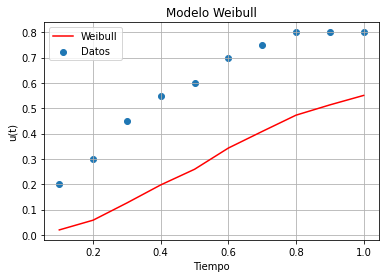

In [24]:
print("Datos de Weibull =",wb)
print()
plt.figure(0)
plt.title("Modelo Weibull")
plt.scatter(a1,a2, label="Datos")
plt.plot(a1, wb, color="red", label="Weibull")
#plt.scatter(a1,wb,color="green")
plt.xlabel("Tiempo")
plt.ylabel("u(t)")
plt.grid()
plt.legend()

Hacemos lo mismo para el modelo Higuchi, mostramos datos al igual que su gráfico:

Datos de Higuchi=  [0.044721359549995794, 0.10954451150103323, 0.2012461179749811, 0.29664793948382656, 0.3872983346207417, 0.5019960159204453, 0.6062177826491071, 0.7155417527999327, 0.8049844718999243, 0.8944271909999159]


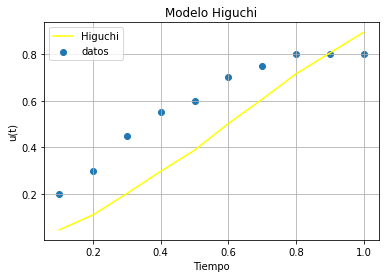

In [25]:
plt.figure(1)
plt.title("Modelo Higuchi")
plt.scatter(a1,a2, label="datos")
print("Datos de Higuchi= ",hg)
plt.plot(a1,hg,color="yellow", label="Higuchi")
#plt.scatter(a1,hg,color="red")
plt.xlabel("Tiempo")
plt.ylabel("u(t)")
plt.grid()
plt.legend()

La función de costo definida anteriormente(Higuchi), nos servirá para medir la diferencia de lo pronosticado por el modelo a los datos experimentales. Para realizar la sumatoria "a mano", se utilizará la página "Symbolab" con los siguientes datos: 
$ ((0.044721359549995794)-0.2)^2 + ((0.10954451150103323)-0.3)^2 + ((0.2012461179749811)-0.45)^2 ... + ((0.8944271909999159)-0.8)^2 $ (Osea la sumatoria de todos los datos entregados por Higuchi). Obteniendo como resultado = $ 0.31953358 $

In [31]:
resultados = []
for i in range(len(a2)):
    resultados.append((hg[i] - a2[i])**2)
print("")
print("Valores por paréntesis : ",resultados)
print("")
print("La Función de Costo es: ",np.sum(resultados))
print("")
print("El mínimo es: ",np.amin(resultados))


Valores por paréntesis :  [0.024111456180001687, 0.03627329309938006, 0.061878493822517026, 0.06418726656779083, 0.045241998455109955, 0.03920557771137654, 0.020673326026339412, 0.007133195520107682, 2.4844960121134328e-05, 0.008916494400134582]

La Función de Costo es:  0.30764594674287893

El mínimo es:  2.4844960121134328e-05


## Función de Rosenbrok

Se tiene la siguiente función de Rosenbrok: 

$ f(x,y) = (x-1)^{2}+b(y-x^2)^{2} $

En donde b = 10

In [32]:
b=10;

f = lambda x,y: (x-1)**2 + b*(y-x**2)**2;

Evaluamos la función:

In [33]:
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

Y luego graficamos : 

<ipython-input-36-4fdb043f78d1>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


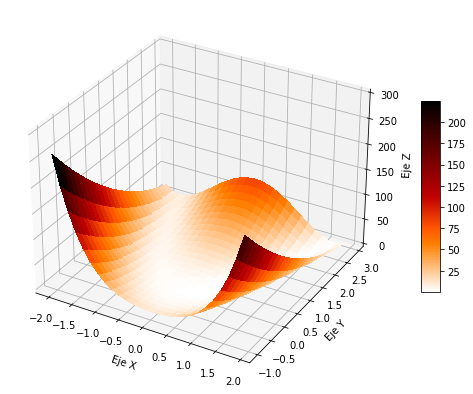

In [36]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
ros = ax.plot_surface(X, Y, Z, cmap=cm.gist_heat_r, linewidth=0, antialiased=False)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

ax.set_zlim(0, 300)
fig.colorbar(ros, shrink=0.5, aspect=10)
plt.show()

El cálculo de su gradiente se obtiene de la siguiente forma: 

In [37]:
df = lambda x,y: np.array([2*(x-1) - 4*b*(y - x**2)*x, \
                         2*b*(y-x**2)])
    
F = lambda X: f(X[0],X[1])
dF = lambda X: df(X[0],X[1])

x_0 = np.array([-1.4,1.1])
print(F(x_0))
print(dF(x_0))

13.155999999999993
[-52.96 -17.2 ]


Y su dirección de descenso: 

[52.96 17.2 ]


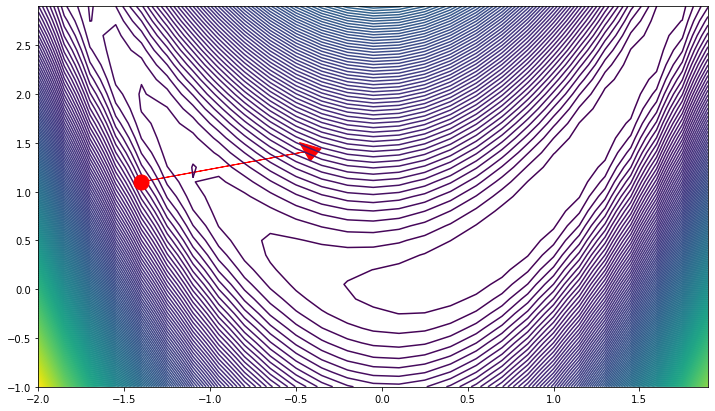

In [38]:
fx = F(x_0);
gx = dF(x_0);
s = -gx;
print(s)

plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
ns = np.sqrt(s[0]**2+s[1]**2);
plt.plot([x_0[0]],[x_0[1]],marker='o',markersize=15, color ='r')
plt.arrow(x_0[0],x_0[1],s[0]/ns,s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')